In [531]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor

In [532]:
data = pd.read_csv('purchasedata.csv', header=[0,1,2])

data.columns.name = None

print(data) 

       A_Plus                                                              \
        Cm-01                                               Cm-02           
         DATE ITEM_NO            ITEM_NAME STOCK SALE        DATE ITEM_NO   
0  01-07-2023   11101     Apple 14 Pro Max     5    1  01-07-2023   11106   
1  02-07-2023   11102         Vivo 15 Plus    10    8  02-07-2023   11107   
2  03-07-2023   11103     Apple 13 Pro Max     4    0  03-07-2023   11108   
3  04-07-2023   11104  Oppo Reno 10 Series     4    1  04-07-2023   11109   
4  05-07-2023   11105          samsung S23    12    9  05-07-2023   11110   
5  06-07-2023   15786           Realme C52    14   11  06-07-2023   11789   
6  07-07-2023   15787       OnePlus Nord 3     8    6  07-07-2023   12346   

                                   ...           C          \
                                   ...       Cm-12           
             ITEM_NAME STOCK SALE  ...        DATE ITEM_NO   
0     Apple 14 Pro Max     5    0  ...  01-

In [533]:
data

A_Plus                                                              \
        Cm-01                                               Cm-02           
         DATE ITEM_NO            ITEM_NAME STOCK SALE        DATE ITEM_NO   
0  01-07-2023   11101     Apple 14 Pro Max     5    1  01-07-2023   11106   
1  02-07-2023   11102         Vivo 15 Plus    10    8  02-07-2023   11107   
2  03-07-2023   11103     Apple 13 Pro Max     4    0  03-07-2023   11108   
3  04-07-2023   11104  Oppo Reno 10 Series     4    1  04-07-2023   11109   
4  05-07-2023   11105          samsung S23    12    9  05-07-2023   11110   
5  06-07-2023   15786           Realme C52    14   11  06-07-2023   11789   
6  07-07-2023   15787       OnePlus Nord 3     8    6  07-07-2023   12346   

                                   ...           C          \
                                   ...       Cm-12           
             ITEM_NAME STOCK SALE  ...        DATE ITEM_NO   
0     Apple 14 Pro Max     5    0  ...  01-07-2023   11156   
1        Apple 14 Plus    10    4  ...  02-07-2023   11157   
2     Apple 13 Pro Max     4    3  ...  03-07-2023   11158   
3  Oppo Reno 10 Series     4    2  ...  04-07-2023   11159   
4  Oppo Reno 09 series    12    4  ...  05-07-2023   11160   
5         Realme 11Pro     6    3  ...  06-07-2023   11178   
6           Realme C52     8    4  ...  07-07-2023   11179   

                                                                            \
                                        Cm-13                                
             ITEM_NAME STOCK SALE        DATE ITEM_NO            ITEM_NAME   
0                Redmi     5    4  01-07-2023   11161     Apple 14 Pro Max   
1         Vivo 15 Plus    10    8  02-07-2023   11162        Apple 14 Plus   
2     Apple 13 Pro Max     4    1  03-07-2023   11163     Apple 13 Pro Max   
3  Oppo Reno 10 Series     4    2  04-07-2023   11164  Oppo Reno 10 Series   
4  Oppo Reno 09 series    12    8  05-07-2023   11165  Oppo Reno 09 series   
5         Realme 11Pro     7    6  06-07-2023   11639           Realme C52   
6   Samsung Galaxy F54     7    1  07-07-2023   11640       OnePlus Nord 3   

              
              
  STOCK SALE  
0     5    3  
1    10    9  
2     4    1  
3     4    4  
4    12   11  
5     8    4  
6     5    0  

[7 rows x 65 columns]

In [534]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 65 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   (A_Plus, Cm-01, DATE)       7 non-null      object
 1   (A_Plus, Cm-01, ITEM_NO)    7 non-null      int64 
 2   (A_Plus, Cm-01, ITEM_NAME)  7 non-null      object
 3   (A_Plus, Cm-01, STOCK)      7 non-null      int64 
 4   (A_Plus, Cm-01, SALE)       7 non-null      int64 
 5   (A_Plus, Cm-02, DATE)       7 non-null      object
 6   (A_Plus, Cm-02, ITEM_NO)    7 non-null      int64 
 7   (A_Plus, Cm-02, ITEM_NAME)  7 non-null      object
 8   (A_Plus, Cm-02, STOCK)      7 non-null      int64 
 9   (A_Plus, Cm-02, SALE)       7 non-null      int64 
 10  (A_Plus, Cm-03, DATE)       7 non-null      object
 11  (A_Plus, Cm-03, ITEM_NO)    7 non-null      int64 
 12  (A_Plus, Cm-03, ITEM_NAME)  7 non-null      object
 13  (A_Plus, Cm-03, STOCK)      7 non-null      int64 
 14

In [535]:
data.columns.levels

FrozenList([['A', 'A_Plus', 'B', 'C'], ['Cm-01', 'Cm-02', 'Cm-03', 'Cm-04', 'Cm-05', 'Cm-06', 'Cm-07', 'Cm-08', 'Cm-09', 'Cm-10', 'Cm-11', 'Cm-12', 'Cm-13'], ['DATE', 'ITEM_NAME', 'ITEM_NO', 'SALE', 'STOCK']])

In [536]:
data

A_Plus                                                              \
        Cm-01                                               Cm-02           
         DATE ITEM_NO            ITEM_NAME STOCK SALE        DATE ITEM_NO   
0  01-07-2023   11101     Apple 14 Pro Max     5    1  01-07-2023   11106   
1  02-07-2023   11102         Vivo 15 Plus    10    8  02-07-2023   11107   
2  03-07-2023   11103     Apple 13 Pro Max     4    0  03-07-2023   11108   
3  04-07-2023   11104  Oppo Reno 10 Series     4    1  04-07-2023   11109   
4  05-07-2023   11105          samsung S23    12    9  05-07-2023   11110   
5  06-07-2023   15786           Realme C52    14   11  06-07-2023   11789   
6  07-07-2023   15787       OnePlus Nord 3     8    6  07-07-2023   12346   

                                   ...           C          \
                                   ...       Cm-12           
             ITEM_NAME STOCK SALE  ...        DATE ITEM_NO   
0     Apple 14 Pro Max     5    0  ...  01-07-2023   11156   
1        Apple 14 Plus    10    4  ...  02-07-2023   11157   
2     Apple 13 Pro Max     4    3  ...  03-07-2023   11158   
3  Oppo Reno 10 Series     4    2  ...  04-07-2023   11159   
4  Oppo Reno 09 series    12    4  ...  05-07-2023   11160   
5         Realme 11Pro     6    3  ...  06-07-2023   11178   
6           Realme C52     8    4  ...  07-07-2023   11179   

                                                                            \
                                        Cm-13                                
             ITEM_NAME STOCK SALE        DATE ITEM_NO            ITEM_NAME   
0                Redmi     5    4  01-07-2023   11161     Apple 14 Pro Max   
1         Vivo 15 Plus    10    8  02-07-2023   11162        Apple 14 Plus   
2     Apple 13 Pro Max     4    1  03-07-2023   11163     Apple 13 Pro Max   
3  Oppo Reno 10 Series     4    2  04-07-2023   11164  Oppo Reno 10 Series   
4  Oppo Reno 09 series    12    8  05-07-2023   11165  Oppo Reno 09 series   
5         Realme 11Pro     7    6  06-07-2023   11639           Realme C52   
6   Samsung Galaxy F54     7    1  07-07-2023   11640       OnePlus Nord 3   

              
              
  STOCK SALE  
0     5    3  
1    10    9  
2     4    1  
3     4    4  
4    12   11  
5     8    4  
6     5    0  

[7 rows x 65 columns]

In [537]:
# Individual store data

data['A_Plus','Cm-01']

C:\Users\deepa\AppData\Local\Temp\ipykernel_11004\3907639560.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  data['A_Plus','Cm-01']


,DATE,ITEM_NO,ITEM_NAME,STOCK,SALE
0,01-07-2023,11101,Apple 14 Pro Max,5,1
1,02-07-2023,11102,Vivo 15 Plus,10,8
2,03-07-2023,11103,Apple 13 Pro Max,4,0
3,04-07-2023,11104,Oppo Reno 10 Series,4,1
4,05-07-2023,11105,samsung S23,12,9
5,06-07-2023,15786,Realme C52,14,11
6,07-07-2023,15787,OnePlus Nord 3,8,6


In [538]:
print(data.columns)

MultiIndex([('A_Plus', 'Cm-01',      'DATE'),
            ('A_Plus', 'Cm-01',   'ITEM_NO'),
            ('A_Plus', 'Cm-01', 'ITEM_NAME'),
            ('A_Plus', 'Cm-01',     'STOCK'),
            ('A_Plus', 'Cm-01',      'SALE'),
            ('A_Plus', 'Cm-02',      'DATE'),
            ('A_Plus', 'Cm-02',   'ITEM_NO'),
            ('A_Plus', 'Cm-02', 'ITEM_NAME'),
            ('A_Plus', 'Cm-02',     'STOCK'),
            ('A_Plus', 'Cm-02',      'SALE'),
            ('A_Plus', 'Cm-03',      'DATE'),
            ('A_Plus', 'Cm-03',   'ITEM_NO'),
            ('A_Plus', 'Cm-03', 'ITEM_NAME'),
            ('A_Plus', 'Cm-03',     'STOCK'),
            ('A_Plus', 'Cm-03',      'SALE'),
            (     'A', 'Cm-04',      'DATE'),
            (     'A', 'Cm-04',   'ITEM_NO'),
            (     'A', 'Cm-04', 'ITEM_NAME'),
            (     'A', 'Cm-04',     'STOCK'),
            (     'A', 'Cm-04',      'SALE'),
            (     'A', 'Cm-05',      'DATE'),
            (     'A', 'Cm-05',   

### Calculate Sales Percentage for each Store

In [539]:
for store in data.columns.get_level_values(0).unique():
    for cm in data.columns.get_level_values(1).unique():
        try:
            sale_data = data.loc[:, (store, cm, 'SALE')]
            stock_data = data.loc[:, (store, cm, 'STOCK')]
            data[(store, cm, 'Sale_Percentage')] = (sale_data / stock_data) * 100
        except KeyError:
            pass

print(data)

       A_Plus                                                              \
        Cm-01                                               Cm-02           
         DATE ITEM_NO            ITEM_NAME STOCK SALE        DATE ITEM_NO   
0  01-07-2023   11101     Apple 14 Pro Max     5    1  01-07-2023   11106   
1  02-07-2023   11102         Vivo 15 Plus    10    8  02-07-2023   11107   
2  03-07-2023   11103     Apple 13 Pro Max     4    0  03-07-2023   11108   
3  04-07-2023   11104  Oppo Reno 10 Series     4    1  04-07-2023   11109   
4  05-07-2023   11105          samsung S23    12    9  05-07-2023   11110   
5  06-07-2023   15786           Realme C52    14   11  06-07-2023   11789   
6  07-07-2023   15787       OnePlus Nord 3     8    6  07-07-2023   12346   

                                   ...               A                  \
                                   ...           Cm-04           Cm-05   
             ITEM_NAME STOCK SALE  ... Sale_Percentage Sale_Percentage   
0     A

In [540]:
data

A_Plus                                                              \
        Cm-01                                               Cm-02           
         DATE ITEM_NO            ITEM_NAME STOCK SALE        DATE ITEM_NO   
0  01-07-2023   11101     Apple 14 Pro Max     5    1  01-07-2023   11106   
1  02-07-2023   11102         Vivo 15 Plus    10    8  02-07-2023   11107   
2  03-07-2023   11103     Apple 13 Pro Max     4    0  03-07-2023   11108   
3  04-07-2023   11104  Oppo Reno 10 Series     4    1  04-07-2023   11109   
4  05-07-2023   11105          samsung S23    12    9  05-07-2023   11110   
5  06-07-2023   15786           Realme C52    14   11  06-07-2023   11789   
6  07-07-2023   15787       OnePlus Nord 3     8    6  07-07-2023   12346   

                                   ...               A                  \
                                   ...           Cm-04           Cm-05   
             ITEM_NAME STOCK SALE  ... Sale_Percentage Sale_Percentage   
0     Apple 14 Pro Max     5    0  ...       60.000000       40.000000   
1        Apple 14 Plus    10    4  ...       60.000000       90.000000   
2     Apple 13 Pro Max     4    3  ...       50.000000       25.000000   
3  Oppo Reno 10 Series     4    2  ...       50.000000       75.000000   
4  Oppo Reno 09 series    12    4  ...      100.000000       33.333333   
5         Realme 11Pro     6    3  ...       13.333333       12.500000   
6           Realme C52     8    4  ...       42.857143       77.777778   

                B                                               C  \
            Cm-06           Cm-07           Cm-08           Cm-09   
  Sale_Percentage Sale_Percentage Sale_Percentage Sale_Percentage   
0            20.0       40.000000        0.000000       40.000000   
1            40.0       40.000000       40.000000       30.000000   
2            50.0       75.000000       25.000000       50.000000   
3           100.0       50.000000       50.000000       50.000000   
4            75.0       41.666667       33.333333       33.333333   
5           100.0        0.000000       90.909091       60.000000   
6             0.0       13.333333      100.000000       62.500000   

                                                                   
            Cm-10           Cm-11           Cm-12           Cm-13  
  Sale_Percentage Sale_Percentage Sale_Percentage Sale_Percentage  
0       20.000000            40.0       80.000000       60.000000  
1       20.000000            50.0       80.000000       90.000000  
2       75.000000            75.0       25.000000       25.000000  
3       50.000000            50.0       50.000000      100.000000  
4       41.666667            25.0       66.666667       91.666667  
5       50.000000            25.0       85.714286       50.000000  
6       66.666667            90.0       14.285714        0.000000  

[7 rows x 78 columns]

In [541]:
# Sale_Percentage for single store

data['A_Plus','Cm-01']

C:\Users\deepa\AppData\Local\Temp\ipykernel_11004\1453481835.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  data['A_Plus','Cm-01']


,DATE,ITEM_NO,ITEM_NAME,STOCK,SALE,Sale_Percentage
0,01-07-2023,11101,Apple 14 Pro Max,5,1,20.000000
1,02-07-2023,11102,Vivo 15 Plus,10,8,80.000000
2,03-07-2023,11103,Apple 13 Pro Max,4,0,0.000000
3,04-07-2023,11104,Oppo Reno 10 Series,4,1,25.000000
4,05-07-2023,11105,samsung S23,12,9,75.000000
5,06-07-2023,15786,Realme C52,14,11,78.571429
6,07-07-2023,15787,OnePlus Nord 3,8,6,75.000000


In [542]:
selected_columns = [65,66,67,68,69,70,71,72,73,74,75,76,77]
df1 = data.iloc[:, selected_columns]
print(df1)

           A_Plus                                               A  \
            Cm-01           Cm-02           Cm-03           Cm-04   
  Sale_Percentage Sale_Percentage Sale_Percentage Sale_Percentage   
0       20.000000        0.000000       40.000000       60.000000   
1       80.000000       40.000000       70.000000       60.000000   
2        0.000000       75.000000       25.000000       50.000000   
3       25.000000       50.000000       75.000000       50.000000   
4       75.000000       33.333333       66.666667      100.000000   
5       78.571429       50.000000       87.500000       13.333333   
6       75.000000       50.000000       44.444444       42.857143   

                                B                                  \
            Cm-05           Cm-06           Cm-07           Cm-08   
  Sale_Percentage Sale_Percentage Sale_Percentage Sale_Percentage   
0       40.000000            20.0       40.000000        0.000000   
1       90.000000            40.0

In [543]:
sale = data[("A_Plus", "Cm-01", "Sale_Percentage")] > 50
sale

0    False
1     True
2    False
3    False
4     True
5     True
6     True
Name: (A_Plus, Cm-01, Sale_Percentage), dtype: bool

In [544]:
data

A_Plus                                                              \
        Cm-01                                               Cm-02           
         DATE ITEM_NO            ITEM_NAME STOCK SALE        DATE ITEM_NO   
0  01-07-2023   11101     Apple 14 Pro Max     5    1  01-07-2023   11106   
1  02-07-2023   11102         Vivo 15 Plus    10    8  02-07-2023   11107   
2  03-07-2023   11103     Apple 13 Pro Max     4    0  03-07-2023   11108   
3  04-07-2023   11104  Oppo Reno 10 Series     4    1  04-07-2023   11109   
4  05-07-2023   11105          samsung S23    12    9  05-07-2023   11110   
5  06-07-2023   15786           Realme C52    14   11  06-07-2023   11789   
6  07-07-2023   15787       OnePlus Nord 3     8    6  07-07-2023   12346   

                                   ...               A                  \
                                   ...           Cm-04           Cm-05   
             ITEM_NAME STOCK SALE  ... Sale_Percentage Sale_Percentage   
0     Apple 14 Pro Max     5    0  ...       60.000000       40.000000   
1        Apple 14 Plus    10    4  ...       60.000000       90.000000   
2     Apple 13 Pro Max     4    3  ...       50.000000       25.000000   
3  Oppo Reno 10 Series     4    2  ...       50.000000       75.000000   
4  Oppo Reno 09 series    12    4  ...      100.000000       33.333333   
5         Realme 11Pro     6    3  ...       13.333333       12.500000   
6           Realme C52     8    4  ...       42.857143       77.777778   

                B                                               C  \
            Cm-06           Cm-07           Cm-08           Cm-09   
  Sale_Percentage Sale_Percentage Sale_Percentage Sale_Percentage   
0            20.0       40.000000        0.000000       40.000000   
1            40.0       40.000000       40.000000       30.000000   
2            50.0       75.000000       25.000000       50.000000   
3           100.0       50.000000       50.000000       50.000000   
4            75.0       41.666667       33.333333       33.333333   
5           100.0        0.000000       90.909091       60.000000   
6             0.0       13.333333      100.000000       62.500000   

                                                                   
            Cm-10           Cm-11           Cm-12           Cm-13  
  Sale_Percentage Sale_Percentage Sale_Percentage Sale_Percentage  
0       20.000000            40.0       80.000000       60.000000  
1       20.000000            50.0       80.000000       90.000000  
2       75.000000            75.0       25.000000       25.000000  
3       50.000000            50.0       50.000000      100.000000  
4       41.666667            25.0       66.666667       91.666667  
5       50.000000            25.0       85.714286       50.000000  
6       66.666667            90.0       14.285714        0.000000  

[7 rows x 78 columns]

In [545]:
# Filter Sale_Percentage > 80% for each group ('A_Plus', 'A', 'B', 'C')

a_plus = data[('A_Plus', 'Cm-01', 'Sale_Percentage')] > 80.0
a = data[('A', 'Cm-04', 'Sale_Percentage')] > 80.0
b = data[('B', 'Cm-06', 'Sale_Percentage')] > 80.0
c = data[('C', 'Cm-09', 'Sale_Percentage')] > 80.0


a_plus_data = data[a_plus]
a_data = data[a]
b_data = data[b]
c_data = data[c]

# Print the filtered results
if not a_plus_data.empty:
    print("A_Plus:")
    print(a_plus_data)

if not a_data.empty:
    print("\nA:")
    print(a_data)

if not b_data.empty:
    print("\nB:")
    print(b_data)

if not c_data.empty:
    print("\nC:")
    print(c_data)


A:
       A_Plus                                                      \
        Cm-01                                       Cm-02           
         DATE ITEM_NO    ITEM_NAME STOCK SALE        DATE ITEM_NO   
4  05-07-2023   11105  samsung S23    12    9  05-07-2023   11110   

                                   ...               A                  \
                                   ...           Cm-04           Cm-05   
             ITEM_NAME STOCK SALE  ... Sale_Percentage Sale_Percentage   
4  Oppo Reno 09 series    12    4  ...           100.0       33.333333   

                B                                               C  \
            Cm-06           Cm-07           Cm-08           Cm-09   
  Sale_Percentage Sale_Percentage Sale_Percentage Sale_Percentage   
4            75.0       41.666667       33.333333       33.333333   

                                                                   
            Cm-10           Cm-11           Cm-12           Cm-13  
  Sale_Pe

In [546]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   (A_Plus, Cm-01, DATE)             7 non-null      object 
 1   (A_Plus, Cm-01, ITEM_NO)          7 non-null      int64  
 2   (A_Plus, Cm-01, ITEM_NAME)        7 non-null      object 
 3   (A_Plus, Cm-01, STOCK)            7 non-null      int64  
 4   (A_Plus, Cm-01, SALE)             7 non-null      int64  
 5   (A_Plus, Cm-02, DATE)             7 non-null      object 
 6   (A_Plus, Cm-02, ITEM_NO)          7 non-null      int64  
 7   (A_Plus, Cm-02, ITEM_NAME)        7 non-null      object 
 8   (A_Plus, Cm-02, STOCK)            7 non-null      int64  
 9   (A_Plus, Cm-02, SALE)             7 non-null      int64  
 10  (A_Plus, Cm-03, DATE)             7 non-null      object 
 11  (A_Plus, Cm-03, ITEM_NO)          7 non-null      int64  
 12  (A_Plus, Cm-

In [547]:
data.columns.levels

FrozenList([['A', 'A_Plus', 'B', 'C'], ['Cm-01', 'Cm-02', 'Cm-03', 'Cm-04', 'Cm-05', 'Cm-06', 'Cm-07', 'Cm-08', 'Cm-09', 'Cm-10', 'Cm-11', 'Cm-12', 'Cm-13'], ['DATE', 'ITEM_NAME', 'ITEM_NO', 'SALE', 'STOCK', 'Sale_Percentage']])

### Finding the correlation 

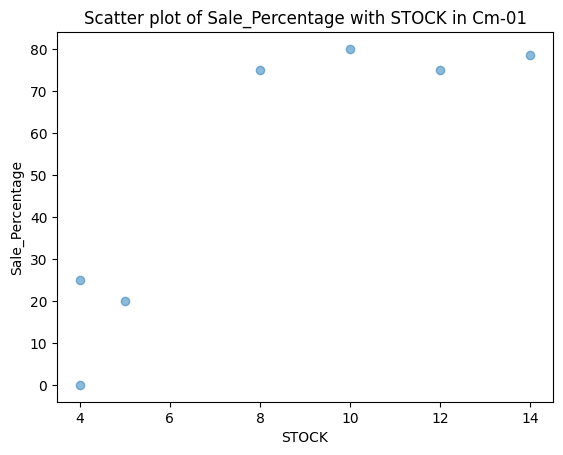

In [548]:
plt.scatter(data['A_Plus', 'Cm-01', 'STOCK'], data['A_Plus', 'Cm-01', 'Sale_Percentage'], alpha=0.5)
plt.title('Scatter plot of Sale_Percentage with STOCK in Cm-01')
plt.xlabel('STOCK')
plt.ylabel('Sale_Percentage')
plt.show()

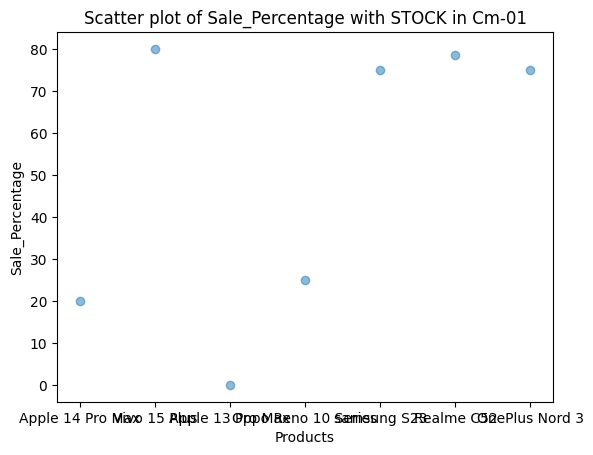

In [549]:
plt.scatter(data['A_Plus', 'Cm-01', 'ITEM_NAME'], data['A_Plus', 'Cm-01', 'Sale_Percentage'], alpha=0.5)
plt.title('Scatter plot of Sale_Percentage with STOCK in Cm-01')
plt.xlabel('Products')
plt.ylabel('Sale_Percentage')
plt.show()

C:\Users\deepa\AppData\Local\Temp\ipykernel_11004\3019268256.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  cm_01_data = data['A_Plus', 'Cm-01'].reset_index(drop=True)


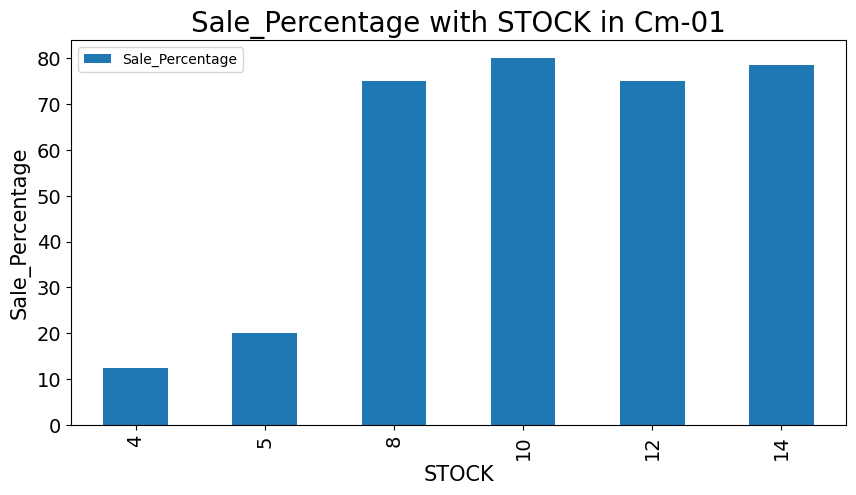

In [550]:
# Calculate the mean of Sale_Percentage for each STOCK in 'Cm-01'
cm_01_data = data['A_Plus', 'Cm-01'].reset_index(drop=True)
mean_sale_percentage = cm_01_data.groupby('STOCK')['Sale_Percentage'].mean()

# Convert to DataFrame and reset the index for plotting
mean_sale_percentage_df = mean_sale_percentage.reset_index()

# Plot the bar chart
ax = mean_sale_percentage_df.plot(x='STOCK', y='Sale_Percentage', kind='bar', figsize=(10, 5), fontsize=14)
ax.set_title("Sale_Percentage with STOCK in Cm-01", fontsize=20)
ax.set_xlabel("STOCK", fontsize=15)
ax.set_ylabel("Sale_Percentage", fontsize=15)

plt.show()

C:\Users\deepa\AppData\Local\Temp\ipykernel_11004\2763864494.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  cm_01_data = data['A_Plus', 'Cm-02'].reset_index(drop=True)


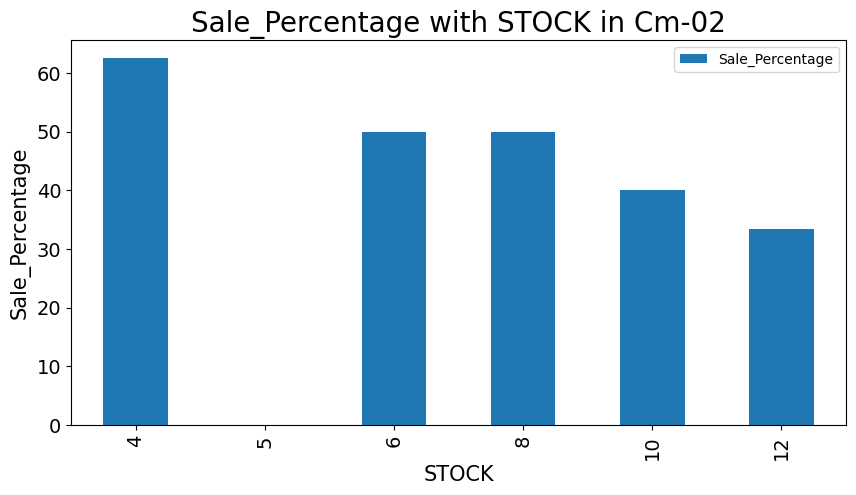

In [551]:
# Calculate the mean of Sale_Percentage for each STOCK in 'Cm-02'
cm_01_data = data['A_Plus', 'Cm-02'].reset_index(drop=True)
mean_sale_percentage = cm_01_data.groupby('STOCK')['Sale_Percentage'].mean()

# Convert to DataFrame and reset the index for plotting
mean_sale_percentage_df = mean_sale_percentage.reset_index()

# Plot the bar chart
ax = mean_sale_percentage_df.plot(x='STOCK', y='Sale_Percentage', kind='bar', figsize=(10, 5), fontsize=14)
ax.set_title("Sale_Percentage with STOCK in Cm-02", fontsize=20)
ax.set_xlabel("STOCK", fontsize=15)
ax.set_ylabel("Sale_Percentage", fontsize=15)

plt.show()

C:\Users\deepa\AppData\Local\Temp\ipykernel_11004\2214287365.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  cm_01_data = data['A_Plus', 'Cm-01'].reset_index(drop=True)


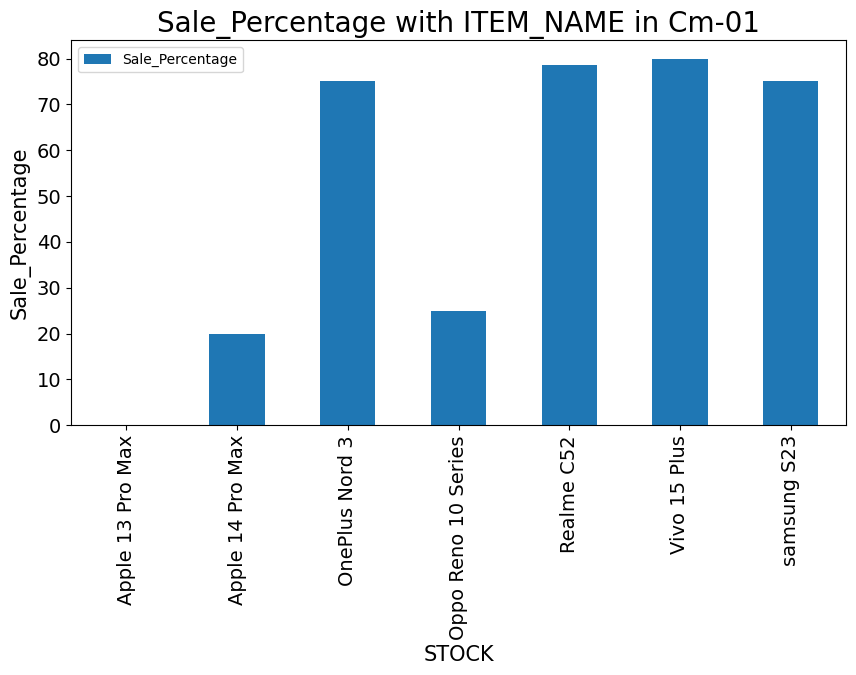

In [552]:
# Calculate the mean of Sale_Percentage for each STOCK in 'Cm-01'
cm_01_data = data['A_Plus', 'Cm-01'].reset_index(drop=True)
mean_sale_percentage = cm_01_data.groupby('ITEM_NAME')['Sale_Percentage'].mean()

# Convert to DataFrame and reset the index for plotting
mean_sale_percentage_df = mean_sale_percentage.reset_index()

# Plot the bar chart
ax = mean_sale_percentage_df.plot(x='ITEM_NAME', y='Sale_Percentage', kind='bar', figsize=(10, 5), fontsize=14)
ax.set_title("Sale_Percentage with ITEM_NAME in Cm-01", fontsize=20)
ax.set_xlabel("STOCK", fontsize=15)
ax.set_ylabel("Sale_Percentage", fontsize=15)

plt.show()

## Drop Date column

In [553]:
for column in data.columns:
    if 'DATE' in column:
        data.drop(column, axis=1, inplace=True)

In [554]:
data

A_Plus                                                                     \
    Cm-01                                   Cm-02                              
  ITEM_NO            ITEM_NAME STOCK SALE ITEM_NO            ITEM_NAME STOCK   
0   11101     Apple 14 Pro Max     5    1   11106     Apple 14 Pro Max     5   
1   11102         Vivo 15 Plus    10    8   11107        Apple 14 Plus    10   
2   11103     Apple 13 Pro Max     4    0   11108     Apple 13 Pro Max     4   
3   11104  Oppo Reno 10 Series     4    1   11109  Oppo Reno 10 Series     4   
4   11105          samsung S23    12    9   11110  Oppo Reno 09 series    12   
5   15786           Realme C52    14   11   11789         Realme 11Pro     6   
6   15787       OnePlus Nord 3     8    6   12346           Realme C52     8   

                                     ...               A                  \
         Cm-03                       ...           Cm-04           Cm-05   
  SALE ITEM_NO            ITEM_NAME  ... Sale_Percentage Sale_Percentage   
0    0   11111     Apple 14 Pro Max  ...       60.000000       40.000000   
1    4   11112        Apple 14 Plus  ...       60.000000       90.000000   
2    3   11113     Apple 13 Pro Max  ...       50.000000       25.000000   
3    2   11114          samsung s21  ...       50.000000       75.000000   
4    4   11115  Oppo Reno 09 series  ...      100.000000       33.333333   
5    3   16934       OnePlus Nord 3  ...       13.333333       12.500000   
6    4   16935         Realme 11Pro  ...       42.857143       77.777778   

                B                                               C  \
            Cm-06           Cm-07           Cm-08           Cm-09   
  Sale_Percentage Sale_Percentage Sale_Percentage Sale_Percentage   
0            20.0       40.000000        0.000000       40.000000   
1            40.0       40.000000       40.000000       30.000000   
2            50.0       75.000000       25.000000       50.000000   
3           100.0       50.000000       50.000000       50.000000   
4            75.0       41.666667       33.333333       33.333333   
5           100.0        0.000000       90.909091       60.000000   
6             0.0       13.333333      100.000000       62.500000   

                                                                   
            Cm-10           Cm-11           Cm-12           Cm-13  
  Sale_Percentage Sale_Percentage Sale_Percentage Sale_Percentage  
0       20.000000            40.0       80.000000       60.000000  
1       20.000000            50.0       80.000000       90.000000  
2       75.000000            75.0       25.000000       25.000000  
3       50.000000            50.0       50.000000      100.000000  
4       41.666667            25.0       66.666667       91.666667  
5       50.000000            25.0       85.714286       50.000000  
6       66.666667            90.0       14.285714        0.000000  

[7 rows x 65 columns]

In [555]:
# Indexing

data.iloc[:, :4]

A_Plus                                
    Cm-01                                
  ITEM_NO            ITEM_NAME STOCK SALE
0   11101     Apple 14 Pro Max     5    1
1   11102         Vivo 15 Plus    10    8
2   11103     Apple 13 Pro Max     4    0
3   11104  Oppo Reno 10 Series     4    1
4   11105          samsung S23    12    9
5   15786           Realme C52    14   11
6   15787       OnePlus Nord 3     8    6

### Label Encoding

In [556]:
data = data.astype(str)

In [557]:
label_encoder = LabelEncoder()

# Iterate through each column and encode its values
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])

# Convert the columns back to numeric dtype 
data = data.astype(float)

In [558]:
data

A_Plus                                                                      \
    Cm-01                        Cm-02                        Cm-03             
  ITEM_NO ITEM_NAME STOCK SALE ITEM_NO ITEM_NAME STOCK SALE ITEM_NO ITEM_NAME   
0     0.0       1.0   4.0  1.0     0.0       2.0   3.0  0.0     0.0       2.0   
1     1.0       5.0   0.0  4.0     1.0       1.0   0.0  3.0     1.0       1.0   
2     2.0       0.0   3.0  0.0     2.0       0.0   2.0  2.0     2.0       0.0   
3     3.0       3.0   3.0  1.0     3.0       4.0   2.0  1.0     3.0       6.0   
4     4.0       6.0   1.0  5.0     4.0       3.0   1.0  3.0     4.0       4.0   
5     5.0       4.0   2.0  2.0     5.0       5.0   4.0  2.0     5.0       3.0   
6     6.0       2.0   5.0  3.0     6.0       6.0   5.0  3.0     6.0       5.0   

   ...               A                               B                  \
   ...           Cm-04           Cm-05           Cm-06           Cm-07   
   ... Sale_Percentage Sale_Percentage Sale_Percentage Sale_Percentage   
0  ...             4.0             3.0             2.0             2.0   
1  ...             4.0             6.0             3.0             2.0   
2  ...             3.0             1.0             4.0             5.0   
3  ...             3.0             4.0             1.0             4.0   
4  ...             0.0             2.0             5.0             3.0   
5  ...             1.0             0.0             1.0             0.0   
6  ...             2.0             5.0             0.0             1.0   

                                C                                  \
            Cm-08           Cm-09           Cm-10           Cm-11   
  Sale_Percentage Sale_Percentage Sale_Percentage Sale_Percentage   
0             0.0             2.0             0.0             1.0   
1             4.0             0.0             0.0             2.0   
2             2.0             3.0             4.0             3.0   
3             5.0             3.0             2.0             2.0   
4             3.0             1.0             1.0             0.0   
5             6.0             4.0             2.0             0.0   
6             1.0             5.0             3.0             4.0   

                                   
            Cm-12           Cm-13  
  Sale_Percentage Sale_Percentage  
0             4.0             4.0  
1             4.0             5.0  
2             1.0             2.0  
3             2.0             1.0  
4             3.0             6.0  
5             5.0             3.0  
6             0.0             0.0  

[7 rows x 65 columns]

## Splitting the dataset

In [559]:
X = data.iloc[:, :-13] 

In [560]:
X

A_Plus                                                                      \
    Cm-01                        Cm-02                        Cm-03             
  ITEM_NO ITEM_NAME STOCK SALE ITEM_NO ITEM_NAME STOCK SALE ITEM_NO ITEM_NAME   
0     0.0       1.0   4.0  1.0     0.0       2.0   3.0  0.0     0.0       2.0   
1     1.0       5.0   0.0  4.0     1.0       1.0   0.0  3.0     1.0       1.0   
2     2.0       0.0   3.0  0.0     2.0       0.0   2.0  2.0     2.0       0.0   
3     3.0       3.0   3.0  1.0     3.0       4.0   2.0  1.0     3.0       6.0   
4     4.0       6.0   1.0  5.0     4.0       3.0   1.0  3.0     4.0       4.0   
5     5.0       4.0   2.0  2.0     5.0       5.0   4.0  2.0     5.0       3.0   
6     6.0       2.0   5.0  3.0     6.0       6.0   5.0  3.0     6.0       5.0   

   ...     C                                                                 
   ... Cm-11        Cm-12                        Cm-13                       
   ... STOCK SALE ITEM_NO ITEM_NAME STOCK SALE ITEM_NO ITEM_NAME STOCK SALE  
0  ...   4.0  1.0     0.0       4.0   3.0  2.0     0.0       2.0   3.0  3.0  
1  ...   0.0  3.0     1.0       6.0   0.0  4.0     1.0       1.0   0.0  5.0  
2  ...   3.0  2.0     2.0       0.0   2.0  0.0     2.0       0.0   2.0  1.0  
3  ...   3.0  1.0     3.0       2.0   2.0  1.0     3.0       5.0   2.0  4.0  
4  ...   1.0  2.0     4.0       1.0   1.0  4.0     4.0       4.0   1.0  2.0  
5  ...   2.0  3.0     5.0       3.0   4.0  3.0     5.0       6.0   4.0  4.0  
6  ...   2.0  0.0     6.0       5.0   4.0  0.0     6.0       3.0   3.0  0.0  

[7 rows x 52 columns]

In [561]:
y = data.iloc[:, 52:65] 

In [562]:
y

A_Plus                                               A  \
            Cm-01           Cm-02           Cm-03           Cm-04   
  Sale_Percentage Sale_Percentage Sale_Percentage Sale_Percentage   
0             1.0             0.0             1.0             4.0   
1             5.0             2.0             4.0             4.0   
2             0.0             4.0             0.0             3.0   
3             2.0             3.0             5.0             3.0   
4             3.0             1.0             3.0             0.0   
5             4.0             3.0             6.0             1.0   
6             3.0             3.0             2.0             2.0   

                                B                                  \
            Cm-05           Cm-06           Cm-07           Cm-08   
  Sale_Percentage Sale_Percentage Sale_Percentage Sale_Percentage   
0             3.0             2.0             2.0             0.0   
1             6.0             3.0             2.0             4.0   
2             1.0             4.0             5.0             2.0   
3             4.0             1.0             4.0             5.0   
4             2.0             5.0             3.0             3.0   
5             0.0             1.0             0.0             6.0   
6             5.0             0.0             1.0             1.0   

                C                                                  \
            Cm-09           Cm-10           Cm-11           Cm-12   
  Sale_Percentage Sale_Percentage Sale_Percentage Sale_Percentage   
0             2.0             0.0             1.0             4.0   
1             0.0             0.0             2.0             4.0   
2             3.0             4.0             3.0             1.0   
3             3.0             2.0             2.0             2.0   
4             1.0             1.0             0.0             3.0   
5             4.0             2.0             0.0             5.0   
6             5.0             3.0             4.0             0.0   

                   
            Cm-13  
  Sale_Percentage  
0             4.0  
1             5.0  
2             2.0  
3             1.0  
4             6.0  
5             3.0  
6             0.0

In [563]:


# Assuming you have already imported the necessary libraries and preprocessed the data

# Create a multi-output regressor with RandomForestRegressor as the base estimator
multioutput_rf = MultiOutputRegressor(RandomForestRegressor(n_estimators=40, random_state=40))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the multi-output regression model
multioutput_rf.fit(X_train_scaled, y_train)

# Predict the consolidated values for each store (Cm-01 to Cm-13)
y_pred = multioutput_rf.predict(X_test_scaled)

# Calculate the overall r2_score for the predictions
r2_score_total = r2_score(y_test, y_pred)
print("r2_score:", r2_score_total)

# Print the predicted consolidated values for each store
for i, store in enumerate(['Cm-01', 'Cm-02', 'Cm-03', 'Cm-04', 'Cm-05', 'Cm-06', 'Cm-07', 'Cm-08', 'Cm-09', 'Cm-10', 'Cm-11', 'Cm-12', 'Cm-13']):
    print(f"Predicted values for {store}: {y_pred[:, i]}")


C:\Users\deepa\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\deepa\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\deepa\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


r2_score: -0.3906085216859671
Predicted values for Cm-01: [2.575 2.15  1.825]
Predicted values for Cm-02: [2.425 1.675 1.6  ]
Predicted values for Cm-03: [3.275 3.525 3.2  ]
Predicted values for Cm-04: [2.475 1.6   2.725]
Predicted values for Cm-05: [3.975 3.05  3.325]
Predicted values for Cm-06: [1.2   3.175 1.875]
Predicted values for Cm-07: [2.75 3.05 3.  ]
Predicted values for Cm-08: [2.85 3.05 3.05]
Predicted values for Cm-09: [3.25  2.225 2.4  ]
Predicted values for Cm-10: [1.775 1.375 1.2  ]
Predicted values for Cm-11: [2.15  1.225 1.45 ]
Predicted values for Cm-12: [1.925 2.4   2.825]
Predicted values for Cm-13: [1.6   3.425 2.875]


In [491]:
new_data = pd.DataFrame({
    'ITEM_NO': [11146],
    'ITEM_NAME': ['Apple 14 Pro Max'],
    'STOCK': [5]
})

# Encode the categorical variables in the new DataFrame
for column in new_data.columns:
    new_data[column] = label_encoder.transform(new_data[column])

# Scale the input features
new_data_scaled = scaler.transform(new_data)

# Check for missing values in the new_data
if new_data.isnull().sum().sum() > 0:
    print("Error: The new_data contains missing values. Please handle them appropriately.")
else:
    # Use the trained multi-output regression model to predict the Sale_Percentage for each store
    sale_percentage_pred = multioutput_rf.predict(new_data_scaled)

    # Print the predicted Sale_Percentage for each store (Cm-01 to Cm-13)
    for i, store in enumerate(['Cm-01', 'Cm-02', 'Cm-03', 'Cm-04', 'Cm-05', 'Cm-06', 'Cm-07', 'Cm-08', 'Cm-09', 'Cm-10', 'Cm-11', 'Cm-12', 'Cm-13']):
        print(f"Predicted Sale_Percentage for {store}: {sale_percentage_pred[0, i]}")


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [405]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [406]:
print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Train target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Train data shape: (4, 52)
Test data shape: (3, 52)
Train target shape: (4, 13)
Test target shape: (3, 13)


In [407]:
print(data.columns)

MultiIndex([('A_Plus', 'Cm-01',         'ITEM_NO'),
            ('A_Plus', 'Cm-01',       'ITEM_NAME'),
            ('A_Plus', 'Cm-01',           'STOCK'),
            ('A_Plus', 'Cm-01',            'SALE'),
            ('A_Plus', 'Cm-02',         'ITEM_NO'),
            ('A_Plus', 'Cm-02',       'ITEM_NAME'),
            ('A_Plus', 'Cm-02',           'STOCK'),
            ('A_Plus', 'Cm-02',            'SALE'),
            ('A_Plus', 'Cm-03',         'ITEM_NO'),
            ('A_Plus', 'Cm-03',       'ITEM_NAME'),
            ('A_Plus', 'Cm-03',           'STOCK'),
            ('A_Plus', 'Cm-03',            'SALE'),
            (     'A', 'Cm-04',         'ITEM_NO'),
            (     'A', 'Cm-04',       'ITEM_NAME'),
            (     'A', 'Cm-04',           'STOCK'),
            (     'A', 'Cm-04',            'SALE'),
            (     'A', 'Cm-05',         'ITEM_NO'),
            (     'A', 'Cm-05',       'ITEM_NAME'),
            (     'A', 'Cm-05',           'STOCK'),
            

### Standardizing the dataset

In [408]:
scaler = StandardScaler()

scaler.fit_transform(X_train)

C:\Users\deepa\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\deepa\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([[ 0.        , -0.2773501 ,  0.4472136 , -0.76249285,  0.        ,
         0.4472136 , -0.4472136 , -0.4472136 ,  0.        ,  1.52127766,
        -0.4472136 , -0.63245553,  0.        ,  0.50709255,  0.4472136 ,
         0.        ,  0.        , -0.63245553, -0.4472136 ,  0.4472136 ,
        -0.11547005,  0.16903085, -0.30151134, -0.16903085,  0.        ,
         1.18321596, -0.16903085, -0.33333333,  0.        ,  0.16903085,
         0.4472136 ,  0.50709255,  0.        , -0.50709255,  0.4472136 ,
        -0.90453403,  0.        ,  0.4472136 , -0.4472136 , -0.63245553,
         0.        ,  1.18321596,  0.4472136 , -0.90453403,  0.        ,
        -0.4472136 , -0.4472136 , -1.34164079,  0.        ,  0.50709255,
        -0.4472136 ,  0.90453403],
       [-1.60356745, -1.38675049,  1.34164079, -0.76249285, -1.60356745,
        -1.34164079,  0.4472136 , -1.34164079, -1.60356745, -1.18321596,
         0.4472136 , -1.26491106, -1.60356745, -1.52127766,  1.34164079,
         1.41421

In [409]:
X_test = scaler.transform(X_test)

C:\Users\deepa\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


## Algorithm_1 - Multiple Linear Regression Model

In [410]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

C:\Users\deepa\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [411]:
# y = mX + C - Linear Regression Model

# where, m-slope, c-intercept

# Finding y_intercept

c = regressor.intercept_
c

array([ 0.78920745, -0.81682395, -0.14336647,  3.19068552,  3.62486817,
        3.97245302,  3.20268271, -1.07560544,  0.65335046, -0.37453146,
        0.83626109,  3.19162083,  5.5583774 ])

In [412]:
#  slope

m = regressor.coef_
m

array([[ 2.51811998e-02,  1.77570198e-02, -1.53931111e-02,
         1.90059007e-02,  2.51811998e-02,  9.78808869e-03,
         1.97100305e-02,  1.53931111e-02,  2.51811998e-02,
        -3.56086707e-02,  1.97100305e-02,  2.84223135e-02,
         2.51811998e-02,  1.01597646e-02, -1.53931111e-02,
        -2.36390871e-03,  2.51811998e-02,  2.84223135e-02,
         1.97100305e-02, -1.97100305e-02,  3.62181694e-02,
         2.08250583e-02,  8.67306090e-03,  1.57647870e-02,
         2.51811998e-02, -1.82625489e-02,  1.77177977e-02,
        -5.06027127e-03,  2.51811998e-02,  2.08250583e-02,
        -2.44378479e-02, -7.92970905e-03,  2.51811998e-02,
        -5.43194720e-03, -2.44378479e-02,  4.81323440e-02,
         2.51811998e-02,  9.78808869e-03,  1.97100305e-02,
         2.84223135e-02,  2.51811998e-02, -1.35347315e-02,
        -1.53931111e-02,  2.40661720e-02,  2.51811998e-02,
         8.30138498e-03,  1.97100305e-02,  2.76789616e-02,
         2.51811998e-02,  1.01597646e-02,  1.97100305e-0

In [413]:
y_prediction = regressor.predict(X_test)

In [414]:
y_prediction

array([[ 1.46929728, -0.36664292,  0.73906332,  2.71667967,  2.50878557,
         3.47891938,  2.0649238 , -0.11180997,  1.29168319, -0.1087581 ,
         0.42194462,  3.97849668,  5.50083653],
       [ 0.23732449, -2.08970496, -1.92173176,  3.53381686,  3.6645047 ,
         4.74466606,  2.99198525, -3.20868053, -0.06088544, -1.18832686,
         0.57434864,  3.55309278,  6.84283686],
       [ 0.44441418, -1.8289139 , -1.55734755,  2.80572473,  4.03211883,
         5.52607312,  3.88069844, -2.58369849, -0.47829474, -0.92763242,
         0.6279534 ,  2.82138427,  7.0495401 ]])

In [415]:
type(y_test)

pandas.core.frame.DataFrame

In [416]:
print("X_test - test X")
print(X_test[0:3])
print("y_test - actual")
print(y_test[0:3])
print("y_prediction - regressor")
print(y_prediction[0:3])

X_test - test X
[[ 1.60356745 -0.83205029  2.23606798  0.45749571  1.60356745  2.23606798
   2.23606798  1.34164079  1.60356745  0.84515425  2.23606798  0.
   1.60356745 -0.84515425  2.23606798  1.41421356  1.60356745  0.
   2.23606798  2.23606798  0.80829038  0.84515425 -0.30151134 -2.19740106
   1.60356745 -0.84515425 -0.84515425 -0.33333333  1.60356745  0.84515425
  -3.13049517 -0.84515425  1.60356745  0.84515425  2.23606798  0.90453403
   1.60356745  2.23606798  2.23606798  1.8973666   1.60356745 -0.84515425
  -0.4472136  -2.11057941  1.60356745  2.23606798  1.34164079 -2.23606798
   1.60356745 -0.84515425  0.4472136  -3.91964748]
 [-0.53452248 -1.94145069  0.4472136  -1.37248713 -0.53452248 -3.13049517
  -0.4472136   0.4472136  -0.53452248 -2.53546276 -0.4472136  -1.8973666
  -0.53452248 -2.19740106  0.4472136   0.         -0.53452248 -2.52982213
  -0.4472136  -1.34164079 -0.57735027 -2.53546276 -0.30151134 -0.84515425
  -0.53452248 -2.87352447 -0.16903085  0.33333333 -0.53452248 

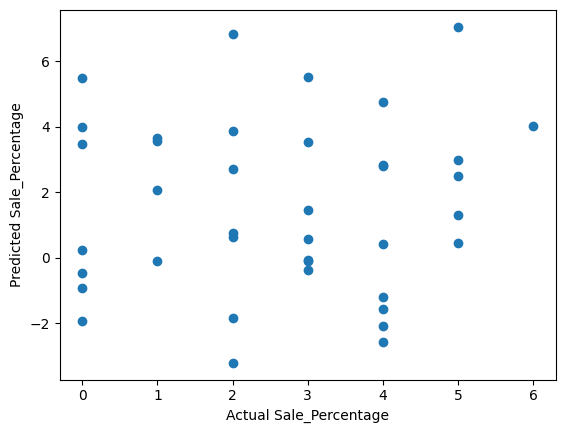

In [417]:
plt.scatter(y_test, y_prediction)
plt.xlabel("Actual Sale_Percentage")
plt.ylabel("Predicted Sale_Percentage")
plt.show()

# Accuracy Score

### R2_Score

In [418]:
score = r2_score(y_test, y_prediction)
score 


# Expected Score is 0.9 to 1.0

-5.3503548327633945

In [419]:
y_prediction_train = regressor.predict(X_train)
y_prediction_train

C:\Users\deepa\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([[ 2.00000000e+00,  3.00000000e+00,  5.00000000e+00,
         3.00000000e+00,  4.00000000e+00,  1.00000000e+00,
         4.00000000e+00,  5.00000000e+00,  3.00000000e+00,
         2.00000000e+00,  2.00000000e+00,  2.00000000e+00,
         1.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         4.00000000e+00,  3.00000000e+00,  2.00000000e+00,
         2.00000000e+00,  6.66133815e-16,  2.00000000e+00,
        -7.21644966e-16,  1.00000000e+00,  4.00000000e+00,
         4.00000000e+00],
       [ 4.00000000e+00,  3.00000000e+00,  6.00000000e+00,
         1.00000000e+00,  1.33226763e-15,  1.00000000e+00,
         2.66453526e-15,  6.00000000e+00,  4.00000000e+00,
         2.00000000e+00,  6.66133815e-16,  5.00000000e+00,
         3.00000000e+00],
       [ 3.00000000e+00,  1.00000000e+00,  3.00000000e+00,
        -2.66453526e-15,  2.00000000e+00,  5.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         1.00000000e+00, -5.55111512e

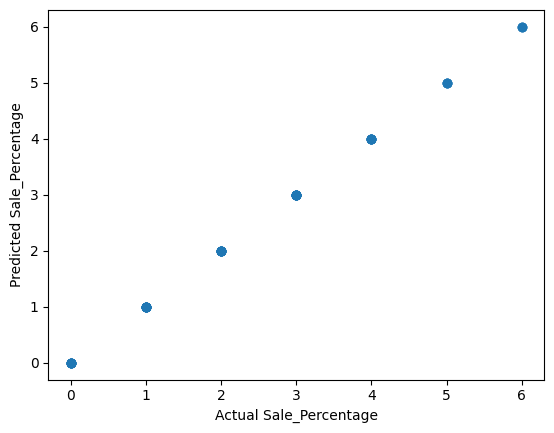

In [420]:
plt.scatter(y_train, y_prediction_train)
plt.xlabel("Actual Sale_Percentage")
plt.ylabel("Predicted Sale_Percentage")
plt.show()

In [421]:
score = r2_score(y_train, y_prediction_train)
score

1.0

# Algorithm_2 - Random Forest Regressor

In [422]:
rf = RandomForestRegressor(n_estimators=30, random_state=30)

In [423]:
rf_model = rf.fit(X_train, y_train)

C:\Users\deepa\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [424]:
print('r2_score: %.2f'% rf_model.score(X_train, y_train))

r2_score: 0.81


C:\Users\deepa\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


### Predict the test results

In [425]:
# label_encoder = LabelEncoder()
# item_names = data.columns.get_level_values(1).unique()
# label_encoder.fit(item_names)

# prediction_item_name = 'Apple 14 Pro Max' 
# if prediction_item_name not in item_names:
#     item_names = np.append(item_names, prediction_item_name)
#     label_encoder.fit(item_names)  

# item_name_encoded = label_encoder.transform([prediction_item_name])[0]

# input_features = [[11140, item_name_encoded, 5, 1]]

# prediction = rf_model.predict(input_features)

# print("Predicted Sale_Percentage:", prediction)


label_encoder = LabelEncoder()
item_names = data.columns.get_level_values(1).unique()
label_encoder.fit(item_names)


prediction_item_name = 'Apple 14 Pro Max'  
if prediction_item_name not in item_names:
    item_names = np.append(item_names, prediction_item_name)
    label_encoder.fit(item_names)

item_name_encoded = label_encoder.transform([prediction_item_name])[0]


input_features = np.zeros(len(data.columns), dtype=int)
input_features[0] = 11140  
input_features[1] = item_name_encoded  
input_features[3] = 5  


print("Number of features in the prediction data:", len(input_features))


print("Number of features used during training:", len(X.columns))


# prediction = rf_model.predict(input_features)

# print("Predicted Sale_Percentage:", prediction)


Number of features in the prediction data: 65
Number of features used during training: 52


## Prediction

In [426]:
ytrain_pred = rf_model.predict(X_train) 

C:\Users\deepa\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


### Mean Absolute Error

In [428]:
print('Mean Absolute Error: %.2f'% mean_absolute_error(y_train, ytrain_pred))

Mean Absolute Error: 0.53


### Mean Squared Error

In [429]:
print('Mean Squared Error: %.2f'% mean_squared_error(y_train, ytrain_pred))

Mean Squared Error: 0.42


### Root Mean Square Error

In [430]:
print('RMSE : ', np.sqrt(mean_squared_error(y_train, ytrain_pred)))

RMSE :  0.6457950774442942


### Explained Variance Score

In [431]:
print('EVS: %.2f'% explained_variance_score(y_train, ytrain_pred))

EVS: 0.82


### Prediction on testing data

In [432]:
ytest_pred = rf_model.predict(X_test) 

In [433]:
ytest_pred

array([[1.96666667, 1.66666667, 3.4       , 2.7       , 3.06666667,
        2.        , 2.9       , 3.06666667, 2.4       , 1.16666667,
        1.2       , 3.03333333, 2.96666667],
       [2.06666667, 1.46666667, 3.2       , 2.4       , 2.86666667,
        2.4       , 2.8       , 2.86666667, 2.2       , 1.06666667,
        1.        , 3.13333333, 3.46666667],
       [2.1       , 1.56666667, 3.33333333, 2.36666667, 2.9       ,
        2.36666667, 2.86666667, 3.03333333, 2.23333333, 1.13333333,
        1.03333333, 3.06666667, 3.36666667]])

### Testing with Real-time data

In [230]:
output_df = pd.DataFrame(ytest_pred)
output_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.966667,1.666667,3.400000,2.700000,3.066667,2.000000,2.900000,3.066667,2.400000,1.166667,1.200000,3.033333,2.966667
1,2.066667,1.466667,3.200000,2.400000,2.866667,2.400000,2.800000,2.866667,2.200000,1.066667,1.000000,3.133333,3.466667
2,2.100000,1.566667,3.333333,2.366667,2.900000,2.366667,2.866667,3.033333,2.233333,1.133333,1.033333,3.066667,3.366667


In [231]:
label_encoder = LabelEncoder()


for column in output_df.columns:
    output_df[column] = label_encoder.fit_transform(output_df[column])
    
output_df = output_df.astype(str)
output_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,2,2,2,2,0,2,2,2,2,2,0,0
1,1,0,0,1,0,2,0,0,0,0,0,2,2
2,2,1,1,0,1,1,1,1,1,1,1,1,1


In [232]:
print('r2_score: %.2f'% r2_score(y_test, ytest_pred))

# or

print('r2_score: %.2f'% rf_model.score(X_test, y_test))

r2_score: -0.89
r2_score: -0.89


In [233]:
print('Mean Absolute Error: %.2f'% mean_absolute_error(y_test, ytest_pred))
print('Mean Squared Error: %.2f'% mean_squared_error(y_test, ytest_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, ytest_pred)))
print('EVS: %.2f'% explained_variance_score(y_test, ytest_pred))

Mean Absolute Error: 1.74
Mean Squared Error: 3.69
RMSE :  1.9208779450480655
EVS: 0.01


## Sales in percentage

In [1434]:
data

A_Plus                                                              \
        Cm-01                                               Cm-02           
         DATE ITEM_NO            ITEM_NAME STOCK SALE        DATE ITEM_NO   
0  01-07-2023   11101     Apple 14 Pro Max     5    1  01-07-2023   11106   
1  02-07-2023   11102         Vivo 15 Plus    10    8  02-07-2023   11107   
2  03-07-2023   11103     Apple 13 Pro Max     4    0  03-07-2023   11108   
3  04-07-2023   11104  Oppo Reno 10 Series     4    1  04-07-2023   11109   
4  05-07-2023   11105          samsung S23    12    9  05-07-2023   11110   
5  06-07-2023   15786           Realme C52    14   11  06-07-2023   11789   
6  07-07-2023   15787       OnePlus Nord 3     8    6  07-07-2023   12346   

                                   ...               A                  \
                                   ...           Cm-04           Cm-05   
             ITEM_NAME STOCK SALE  ... Sale_Percentage Sale_Percentage   
0     Apple 14 Pro Max     5    0  ...       60.000000       40.000000   
1        Apple 14 Plus    10    4  ...       60.000000       90.000000   
2     Apple 13 Pro Max     4    3  ...       50.000000       25.000000   
3  Oppo Reno 10 Series     4    2  ...       50.000000       75.000000   
4  Oppo Reno 09 series    12    4  ...      100.000000       33.333333   
5         Realme 11Pro     6    3  ...       13.333333       12.500000   
6           Realme C52     8    4  ...       42.857143       77.777778   

                B                                               C  \
            Cm-06           Cm-07           Cm-08           Cm-09   
  Sale_Percentage Sale_Percentage Sale_Percentage Sale_Percentage   
0            20.0       40.000000        0.000000       40.000000   
1            40.0       40.000000       40.000000       30.000000   
2            50.0       75.000000       25.000000       50.000000   
3           100.0       50.000000       50.000000       50.000000   
4            75.0       41.666667       33.333333       33.333333   
5           100.0        0.000000       90.909091       60.000000   
6             0.0       13.333333      100.000000       62.500000   

                                                                   
            Cm-10           Cm-11           Cm-12           Cm-13  
  Sale_Percentage Sale_Percentage Sale_Percentage Sale_Percentage  
0       20.000000            40.0       80.000000       60.000000  
1       20.000000            50.0       80.000000       90.000000  
2       75.000000            75.0       25.000000       25.000000  
3       50.000000            50.0       50.000000      100.000000  
4       41.666667            25.0       66.666667       91.666667  
5       50.000000            25.0       85.714286       50.000000  
6       66.666667            90.0       14.285714        0.000000  

[7 rows x 78 columns]

In [1435]:
for store in data.columns.get_level_values(0).unique():
    for cm in data.columns.get_level_values(1).unique():
        try:
            sale_data = data.loc[:, (store, cm, 'SALE')]
            stock_data = data.loc[:, (store, cm, 'STOCK')]
            data[(store, cm, 'Sale_Percentage')] = (sale_data / stock_data) * 100
            data[(store, cm, 'Sale_Percentage')] = data[(store, cm, 'Sale_Percentage')].round(0).astype(int).astype(str) + '%'
        except KeyError:
            pass

print(data)

       A_Plus                                                              \
        Cm-01                                               Cm-02           
         DATE ITEM_NO            ITEM_NAME STOCK SALE        DATE ITEM_NO   
0  01-07-2023   11101     Apple 14 Pro Max     5    1  01-07-2023   11106   
1  02-07-2023   11102         Vivo 15 Plus    10    8  02-07-2023   11107   
2  03-07-2023   11103     Apple 13 Pro Max     4    0  03-07-2023   11108   
3  04-07-2023   11104  Oppo Reno 10 Series     4    1  04-07-2023   11109   
4  05-07-2023   11105          samsung S23    12    9  05-07-2023   11110   
5  06-07-2023   15786           Realme C52    14   11  06-07-2023   11789   
6  07-07-2023   15787       OnePlus Nord 3     8    6  07-07-2023   12346   

                                   ...               A                  \
                                   ...           Cm-04           Cm-05   
             ITEM_NAME STOCK SALE  ... Sale_Percentage Sale_Percentage   
0     A

## Converting DATE object to date format

In [1436]:
for column in data.columns:
    if column[-1] == 'DATE':
        data[column] = pd.to_datetime(data[column])

print(data)

      A_Plus                                                             \
       Cm-01                                              Cm-02           
        DATE ITEM_NO            ITEM_NAME STOCK SALE       DATE ITEM_NO   
0 2023-01-07   11101     Apple 14 Pro Max     5    1 2023-01-07   11106   
1 2023-02-07   11102         Vivo 15 Plus    10    8 2023-02-07   11107   
2 2023-03-07   11103     Apple 13 Pro Max     4    0 2023-03-07   11108   
3 2023-04-07   11104  Oppo Reno 10 Series     4    1 2023-04-07   11109   
4 2023-05-07   11105          samsung S23    12    9 2023-05-07   11110   
5 2023-06-07   15786           Realme C52    14   11 2023-06-07   11789   
6 2023-07-07   15787       OnePlus Nord 3     8    6 2023-07-07   12346   

                                   ...               A                  \
                                   ...           Cm-04           Cm-05   
             ITEM_NAME STOCK SALE  ... Sale_Percentage Sale_Percentage   
0     Apple 14 Pro Max     

In [1437]:
final_data = pd.DataFrame()

# Iterate over each 'Cm-xx' group
for cm in data.columns.get_level_values(1).unique():
    # Extract the relevant columns for each 'Cm-xx' group
    cm_data = data.loc[:, (slice(None), cm, slice(None))]

    # Get the 'Sale_Percentage' columns for the current 'Cm-xx' group
    sale_percentage_cols = cm_data.filter(like='Sale_Percentage')

    # Concatenate the original DataFrame with the 'Sale_Percentage' columns for the current 'Cm-xx' group
    cm_data_aligned = pd.concat([cm_data.drop(sale_percentage_cols, axis=1), sale_percentage_cols], axis=1)

    # Append the aligned data for the current 'Cm-xx' group to the final result DataFrame
    final_data = pd.concat([final_data, cm_data_aligned], axis=1)

print(final_data)

      A_Plus                                                          \
       Cm-01                                                           
        DATE ITEM_NO            ITEM_NAME STOCK SALE Sale_Percentage   
0 2023-01-07   11101     Apple 14 Pro Max     5    1             20%   
1 2023-02-07   11102         Vivo 15 Plus    10    8             80%   
2 2023-03-07   11103     Apple 13 Pro Max     4    0              0%   
3 2023-04-07   11104  Oppo Reno 10 Series     4    1             25%   
4 2023-05-07   11105          samsung S23    12    9             75%   
5 2023-06-07   15786           Realme C52    14   11             79%   
6 2023-07-07   15787       OnePlus Nord 3     8    6             75%   

                                                 ...                    C  \
       Cm-02                                     ...                Cm-12   
        DATE ITEM_NO            ITEM_NAME STOCK  ...            ITEM_NAME   
0 2023-01-07   11106     Apple 14 Pro Max     5 

In [1438]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   (A_Plus, Cm-01, DATE)             7 non-null      datetime64[ns]
 1   (A_Plus, Cm-01, ITEM_NO)          7 non-null      int64         
 2   (A_Plus, Cm-01, ITEM_NAME)        7 non-null      object        
 3   (A_Plus, Cm-01, STOCK)            7 non-null      int64         
 4   (A_Plus, Cm-01, SALE)             7 non-null      int64         
 5   (A_Plus, Cm-02, DATE)             7 non-null      datetime64[ns]
 6   (A_Plus, Cm-02, ITEM_NO)          7 non-null      int64         
 7   (A_Plus, Cm-02, ITEM_NAME)        7 non-null      object        
 8   (A_Plus, Cm-02, STOCK)            7 non-null      int64         
 9   (A_Plus, Cm-02, SALE)             7 non-null      int64         
 10  (A_Plus, Cm-03, DATE)             7 non-null      date

In [1439]:
data

A_Plus                                                             \
       Cm-01                                              Cm-02           
        DATE ITEM_NO            ITEM_NAME STOCK SALE       DATE ITEM_NO   
0 2023-01-07   11101     Apple 14 Pro Max     5    1 2023-01-07   11106   
1 2023-02-07   11102         Vivo 15 Plus    10    8 2023-02-07   11107   
2 2023-03-07   11103     Apple 13 Pro Max     4    0 2023-03-07   11108   
3 2023-04-07   11104  Oppo Reno 10 Series     4    1 2023-04-07   11109   
4 2023-05-07   11105          samsung S23    12    9 2023-05-07   11110   
5 2023-06-07   15786           Realme C52    14   11 2023-06-07   11789   
6 2023-07-07   15787       OnePlus Nord 3     8    6 2023-07-07   12346   

                                   ...               A                  \
                                   ...           Cm-04           Cm-05   
             ITEM_NAME STOCK SALE  ... Sale_Percentage Sale_Percentage   
0     Apple 14 Pro Max     5    0  ...             60%             40%   
1        Apple 14 Plus    10    4  ...             60%             90%   
2     Apple 13 Pro Max     4    3  ...             50%             25%   
3  Oppo Reno 10 Series     4    2  ...             50%             75%   
4  Oppo Reno 09 series    12    4  ...            100%             33%   
5         Realme 11Pro     6    3  ...             13%             12%   
6           Realme C52     8    4  ...             43%             78%   

                B                                               C  \
            Cm-06           Cm-07           Cm-08           Cm-09   
  Sale_Percentage Sale_Percentage Sale_Percentage Sale_Percentage   
0             20%             40%              0%             40%   
1             40%             40%             40%             30%   
2             50%             75%             25%             50%   
3            100%             50%             50%             50%   
4             75%             42%             33%             33%   
5            100%              0%             91%             60%   
6              0%             13%            100%             62%   

                                                                   
            Cm-10           Cm-11           Cm-12           Cm-13  
  Sale_Percentage Sale_Percentage Sale_Percentage Sale_Percentage  
0             20%             40%             80%             60%  
1             20%             50%             80%             90%  
2             75%             75%             25%             25%  
3             50%             50%             50%            100%  
4             42%             25%             67%             92%  
5             50%             25%             86%             50%  
6             67%             90%             14%              0%  

[7 rows x 78 columns]

## Visualize weekly sales

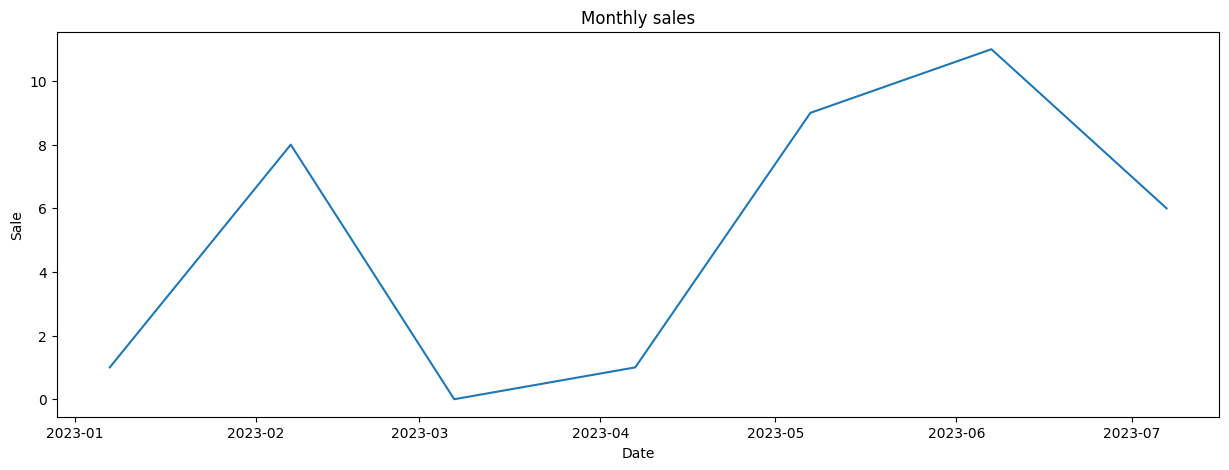

In [1440]:
plt.figure(figsize=(15,5))
plt.plot(data[("A_Plus", "Cm-01", "DATE")], data[("A_Plus", "Cm-01", "SALE")] )
plt.xlabel("Date")
plt.ylabel("Sale")
plt.title("Monthly sales")
plt.show()

In [1441]:
# convert_csv = 'output_data.csv'  
# data.to_csv(convert_csv, index=False)

In [1442]:
final_data = pd.DataFrame()


for cm in data.columns.get_level_values(1).unique():
    
    cm_data = data.loc[:, (slice(None), cm, slice(None))]

    
    sale_percentage_cols = cm_data.filter(like='Sale_Percentage')

    
    cm_data_aligned = pd.concat([cm_data.drop(sale_percentage_cols, axis=1), sale_percentage_cols], axis=1)

    
    final_data = pd.concat([final_data, cm_data_aligned], axis=1)

print(final_data)

      A_Plus                                                          \
       Cm-01                                                           
        DATE ITEM_NO            ITEM_NAME STOCK SALE Sale_Percentage   
0 2023-01-07   11101     Apple 14 Pro Max     5    1             20%   
1 2023-02-07   11102         Vivo 15 Plus    10    8             80%   
2 2023-03-07   11103     Apple 13 Pro Max     4    0              0%   
3 2023-04-07   11104  Oppo Reno 10 Series     4    1             25%   
4 2023-05-07   11105          samsung S23    12    9             75%   
5 2023-06-07   15786           Realme C52    14   11             79%   
6 2023-07-07   15787       OnePlus Nord 3     8    6             75%   

                                                 ...                    C  \
       Cm-02                                     ...                Cm-12   
        DATE ITEM_NO            ITEM_NAME STOCK  ...            ITEM_NAME   
0 2023-01-07   11106     Apple 14 Pro Max     5 

In [1443]:
print(data['A_Plus','Cm-01'])
print(data['A_Plus','Cm-02'])

        DATE  ITEM_NO            ITEM_NAME  STOCK  SALE Sale_Percentage
0 2023-01-07    11101     Apple 14 Pro Max      5     1             20%
1 2023-02-07    11102         Vivo 15 Plus     10     8             80%
2 2023-03-07    11103     Apple 13 Pro Max      4     0              0%
3 2023-04-07    11104  Oppo Reno 10 Series      4     1             25%
4 2023-05-07    11105          samsung S23     12     9             75%
5 2023-06-07    15786           Realme C52     14    11             79%
6 2023-07-07    15787       OnePlus Nord 3      8     6             75%
        DATE  ITEM_NO            ITEM_NAME  STOCK  SALE Sale_Percentage
0 2023-01-07    11106     Apple 14 Pro Max      5     0              0%
1 2023-02-07    11107        Apple 14 Plus     10     4             40%
2 2023-03-07    11108     Apple 13 Pro Max      4     3             75%
3 2023-04-07    11109  Oppo Reno 10 Series      4     2             50%
4 2023-05-07    11110  Oppo Reno 09 series     12     4         

C:\Users\deepa\AppData\Local\Temp\ipykernel_17260\2567161700.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(data['A_Plus','Cm-01'])
C:\Users\deepa\AppData\Local\Temp\ipykernel_17260\2567161700.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(data['A_Plus','Cm-02'])


In [1444]:
data

A_Plus                                                             \
       Cm-01                                              Cm-02           
        DATE ITEM_NO            ITEM_NAME STOCK SALE       DATE ITEM_NO   
0 2023-01-07   11101     Apple 14 Pro Max     5    1 2023-01-07   11106   
1 2023-02-07   11102         Vivo 15 Plus    10    8 2023-02-07   11107   
2 2023-03-07   11103     Apple 13 Pro Max     4    0 2023-03-07   11108   
3 2023-04-07   11104  Oppo Reno 10 Series     4    1 2023-04-07   11109   
4 2023-05-07   11105          samsung S23    12    9 2023-05-07   11110   
5 2023-06-07   15786           Realme C52    14   11 2023-06-07   11789   
6 2023-07-07   15787       OnePlus Nord 3     8    6 2023-07-07   12346   

                                   ...               A                  \
                                   ...           Cm-04           Cm-05   
             ITEM_NAME STOCK SALE  ... Sale_Percentage Sale_Percentage   
0     Apple 14 Pro Max     5    0  ...             60%             40%   
1        Apple 14 Plus    10    4  ...             60%             90%   
2     Apple 13 Pro Max     4    3  ...             50%             25%   
3  Oppo Reno 10 Series     4    2  ...             50%             75%   
4  Oppo Reno 09 series    12    4  ...            100%             33%   
5         Realme 11Pro     6    3  ...             13%             12%   
6           Realme C52     8    4  ...             43%             78%   

                B                                               C  \
            Cm-06           Cm-07           Cm-08           Cm-09   
  Sale_Percentage Sale_Percentage Sale_Percentage Sale_Percentage   
0             20%             40%              0%             40%   
1             40%             40%             40%             30%   
2             50%             75%             25%             50%   
3            100%             50%             50%             50%   
4             75%             42%             33%             33%   
5            100%              0%             91%             60%   
6              0%             13%            100%             62%   

                                                                   
            Cm-10           Cm-11           Cm-12           Cm-13  
  Sale_Percentage Sale_Percentage Sale_Percentage Sale_Percentage  
0             20%             40%             80%             60%  
1             20%             50%             80%             90%  
2             75%             75%             25%             25%  
3             50%             50%             50%            100%  
4             42%             25%             67%             92%  
5             50%             25%             86%             50%  
6             67%             90%             14%              0%  

[7 rows x 78 columns]

In [1445]:
final_data

A_Plus                                                          \
       Cm-01                                                           
        DATE ITEM_NO            ITEM_NAME STOCK SALE Sale_Percentage   
0 2023-01-07   11101     Apple 14 Pro Max     5    1             20%   
1 2023-02-07   11102         Vivo 15 Plus    10    8             80%   
2 2023-03-07   11103     Apple 13 Pro Max     4    0              0%   
3 2023-04-07   11104  Oppo Reno 10 Series     4    1             25%   
4 2023-05-07   11105          samsung S23    12    9             75%   
5 2023-06-07   15786           Realme C52    14   11             79%   
6 2023-07-07   15787       OnePlus Nord 3     8    6             75%   

                                                 ...                    C  \
       Cm-02                                     ...                Cm-12   
        DATE ITEM_NO            ITEM_NAME STOCK  ...            ITEM_NAME   
0 2023-01-07   11106     Apple 14 Pro Max     5  ...                Redmi   
1 2023-02-07   11107        Apple 14 Plus    10  ...         Vivo 15 Plus   
2 2023-03-07   11108     Apple 13 Pro Max     4  ...     Apple 13 Pro Max   
3 2023-04-07   11109  Oppo Reno 10 Series     4  ...  Oppo Reno 10 Series   
4 2023-05-07   11110  Oppo Reno 09 series    12  ...  Oppo Reno 09 series   
5 2023-06-07   11789         Realme 11Pro     6  ...         Realme 11Pro   
6 2023-07-07   12346           Realme C52     8  ...   Samsung Galaxy F54   

                                                                            \
                                  Cm-13                                      
  STOCK SALE Sale_Percentage       DATE ITEM_NO            ITEM_NAME STOCK   
0     5    4             80% 2023-01-07   11161     Apple 14 Pro Max     5   
1    10    8             80% 2023-02-07   11162        Apple 14 Plus    10   
2     4    1             25% 2023-03-07   11163     Apple 13 Pro Max     4   
3     4    2             50% 2023-04-07   11164  Oppo Reno 10 Series     4   
4    12    8             67% 2023-05-07   11165  Oppo Reno 09 series    12   
5     7    6             86% 2023-06-07   11639           Realme C52     8   
6     7    1             14% 2023-07-07   11640       OnePlus Nord 3     5   

                        
                        
  SALE Sale_Percentage  
0    3             60%  
1    9             90%  
2    1             25%  
3    4            100%  
4   11             92%  
5    4             50%  
6    0              0%  

[7 rows x 78 columns]

In [1446]:
final_data.describe()

A_Plus                                                           \
              Cm-01                               Cm-02                        
            ITEM_NO      STOCK       SALE       ITEM_NO      STOCK      SALE   
count      7.000000   7.000000   7.000000      7.000000   7.000000  7.000000   
mean   12441.142857   8.142857   5.142857  11382.142857   7.000000  2.857143   
std     2285.314379   4.017817   4.450789    495.031120   3.109126  1.463850   
min    11101.000000   4.000000   0.000000  11106.000000   4.000000  0.000000   
25%    11102.500000   4.500000   1.000000  11107.500000   4.500000  2.500000   
50%    11104.000000   8.000000   6.000000  11109.000000   6.000000  3.000000   
75%    13445.500000  11.000000   8.500000  11449.500000   9.000000  4.000000   
max    15787.000000  14.000000  11.000000  12346.000000  12.000000  4.000000   

                                                     A  ...         C  \
              Cm-03                              Cm-04  ...     Cm-10   
            ITEM_NO      STOCK      SALE       ITEM_NO  ...      SALE   
count      7.000000   7.000000  7.000000      7.000000  ...  7.000000   
mean   12776.285714   7.428571  4.571429  12421.000000  ...  3.285714   
std     2840.601445   3.154739  2.760262   2225.296535  ...  1.799471   
min    11111.000000   4.000000  1.000000  11116.000000  ...  1.000000   
25%    11112.500000   4.500000  2.500000  11117.500000  ...  2.000000   
50%    11114.000000   8.000000  4.000000  11119.000000  ...  3.000000   
75%    14024.500000   9.500000  7.000000  13399.000000  ...  4.500000   
max    16935.000000  12.000000  8.000000  15679.000000  ...  6.000000   

                                                                             \
              Cm-11                               Cm-12                       
            ITEM_NO      STOCK       SALE       ITEM_NO     STOCK      SALE   
count      7.000000   7.000000   7.000000      7.000000   7.00000  7.000000   
mean   11159.714286  10.714286   5.428571  11163.857143   7.00000  4.285714   
std       11.542881   7.040698   5.682052     10.090071   3.05505  3.093773   
min    11151.000000   4.000000   2.000000  11156.000000   4.00000  1.000000   
25%    11152.500000   4.500000   2.500000  11157.500000   4.50000  1.500000   
50%    11154.000000  10.000000   3.000000  11159.000000   7.00000  4.000000   
75%    11165.500000  16.000000   5.000000  11169.000000   8.50000  7.000000   
max    11177.000000  20.000000  18.000000  11179.000000  12.00000  8.000000   

                                           
              Cm-13                        
            ITEM_NO      STOCK       SALE  
count      7.000000   7.000000   7.000000  
mean   11299.142857   6.857143   4.571429  
std      232.511956   3.184785   4.035556  
min    11161.000000   4.000000   0.000000  
25%    11162.500000   4.500000   2.000000  
50%    11164.000000   5.000000   4.000000  
75%    11402.000000   9.000000   6.500000  
max    11640.000000  12.000000  11.000000  

[8 rows x 39 columns]

In [1447]:
pd.DataFrame(final_data)

A_Plus                                                          \
       Cm-01                                                           
        DATE ITEM_NO            ITEM_NAME STOCK SALE Sale_Percentage   
0 2023-01-07   11101     Apple 14 Pro Max     5    1             20%   
1 2023-02-07   11102         Vivo 15 Plus    10    8             80%   
2 2023-03-07   11103     Apple 13 Pro Max     4    0              0%   
3 2023-04-07   11104  Oppo Reno 10 Series     4    1             25%   
4 2023-05-07   11105          samsung S23    12    9             75%   
5 2023-06-07   15786           Realme C52    14   11             79%   
6 2023-07-07   15787       OnePlus Nord 3     8    6             75%   

                                                 ...                    C  \
       Cm-02                                     ...                Cm-12   
        DATE ITEM_NO            ITEM_NAME STOCK  ...            ITEM_NAME   
0 2023-01-07   11106     Apple 14 Pro Max     5  ...                Redmi   
1 2023-02-07   11107        Apple 14 Plus    10  ...         Vivo 15 Plus   
2 2023-03-07   11108     Apple 13 Pro Max     4  ...     Apple 13 Pro Max   
3 2023-04-07   11109  Oppo Reno 10 Series     4  ...  Oppo Reno 10 Series   
4 2023-05-07   11110  Oppo Reno 09 series    12  ...  Oppo Reno 09 series   
5 2023-06-07   11789         Realme 11Pro     6  ...         Realme 11Pro   
6 2023-07-07   12346           Realme C52     8  ...   Samsung Galaxy F54   

                                                                            \
                                  Cm-13                                      
  STOCK SALE Sale_Percentage       DATE ITEM_NO            ITEM_NAME STOCK   
0     5    4             80% 2023-01-07   11161     Apple 14 Pro Max     5   
1    10    8             80% 2023-02-07   11162        Apple 14 Plus    10   
2     4    1             25% 2023-03-07   11163     Apple 13 Pro Max     4   
3     4    2             50% 2023-04-07   11164  Oppo Reno 10 Series     4   
4    12    8             67% 2023-05-07   11165  Oppo Reno 09 series    12   
5     7    6             86% 2023-06-07   11639           Realme C52     8   
6     7    1             14% 2023-07-07   11640       OnePlus Nord 3     5   

                        
                        
  SALE Sale_Percentage  
0    3             60%  
1    9             90%  
2    1             25%  
3    4            100%  
4   11             92%  
5    4             50%  
6    0              0%  

[7 rows x 78 columns]

In [1448]:
# convert_csv = 'output_data_2.csv'  
# data.to_csv(convert_csv, index=False)

In [1449]:
data

A_Plus                                                             \
       Cm-01                                              Cm-02           
        DATE ITEM_NO            ITEM_NAME STOCK SALE       DATE ITEM_NO   
0 2023-01-07   11101     Apple 14 Pro Max     5    1 2023-01-07   11106   
1 2023-02-07   11102         Vivo 15 Plus    10    8 2023-02-07   11107   
2 2023-03-07   11103     Apple 13 Pro Max     4    0 2023-03-07   11108   
3 2023-04-07   11104  Oppo Reno 10 Series     4    1 2023-04-07   11109   
4 2023-05-07   11105          samsung S23    12    9 2023-05-07   11110   
5 2023-06-07   15786           Realme C52    14   11 2023-06-07   11789   
6 2023-07-07   15787       OnePlus Nord 3     8    6 2023-07-07   12346   

                                   ...               A                  \
                                   ...           Cm-04           Cm-05   
             ITEM_NAME STOCK SALE  ... Sale_Percentage Sale_Percentage   
0     Apple 14 Pro Max     5    0  ...             60%             40%   
1        Apple 14 Plus    10    4  ...             60%             90%   
2     Apple 13 Pro Max     4    3  ...             50%             25%   
3  Oppo Reno 10 Series     4    2  ...             50%             75%   
4  Oppo Reno 09 series    12    4  ...            100%             33%   
5         Realme 11Pro     6    3  ...             13%             12%   
6           Realme C52     8    4  ...             43%             78%   

                B                                               C  \
            Cm-06           Cm-07           Cm-08           Cm-09   
  Sale_Percentage Sale_Percentage Sale_Percentage Sale_Percentage   
0             20%             40%              0%             40%   
1             40%             40%             40%             30%   
2             50%             75%             25%             50%   
3            100%             50%             50%             50%   
4             75%             42%             33%             33%   
5            100%              0%             91%             60%   
6              0%             13%            100%             62%   

                                                                   
            Cm-10           Cm-11           Cm-12           Cm-13  
  Sale_Percentage Sale_Percentage Sale_Percentage Sale_Percentage  
0             20%             40%             80%             60%  
1             20%             50%             80%             90%  
2             75%             75%             25%             25%  
3             50%             50%             50%            100%  
4             42%             25%             67%             92%  
5             50%             25%             86%             50%  
6             67%             90%             14%              0%  

[7 rows x 78 columns]

In [1450]:
# Drop Date column

for column in data.columns:
    if 'DATE' in column:
        data.drop(column, axis=1, inplace=True)


In [1451]:
data

A_Plus                                                                     \
    Cm-01                                   Cm-02                              
  ITEM_NO            ITEM_NAME STOCK SALE ITEM_NO            ITEM_NAME STOCK   
0   11101     Apple 14 Pro Max     5    1   11106     Apple 14 Pro Max     5   
1   11102         Vivo 15 Plus    10    8   11107        Apple 14 Plus    10   
2   11103     Apple 13 Pro Max     4    0   11108     Apple 13 Pro Max     4   
3   11104  Oppo Reno 10 Series     4    1   11109  Oppo Reno 10 Series     4   
4   11105          samsung S23    12    9   11110  Oppo Reno 09 series    12   
5   15786           Realme C52    14   11   11789         Realme 11Pro     6   
6   15787       OnePlus Nord 3     8    6   12346           Realme C52     8   

                                     ...               A                  \
         Cm-03                       ...           Cm-04           Cm-05   
  SALE ITEM_NO            ITEM_NAME  ... Sale_Percentage Sale_Percentage   
0    0   11111     Apple 14 Pro Max  ...             60%             40%   
1    4   11112        Apple 14 Plus  ...             60%             90%   
2    3   11113     Apple 13 Pro Max  ...             50%             25%   
3    2   11114          samsung s21  ...             50%             75%   
4    4   11115  Oppo Reno 09 series  ...            100%             33%   
5    3   16934       OnePlus Nord 3  ...             13%             12%   
6    4   16935         Realme 11Pro  ...             43%             78%   

                B                                               C  \
            Cm-06           Cm-07           Cm-08           Cm-09   
  Sale_Percentage Sale_Percentage Sale_Percentage Sale_Percentage   
0             20%             40%              0%             40%   
1             40%             40%             40%             30%   
2             50%             75%             25%             50%   
3            100%             50%             50%             50%   
4             75%             42%             33%             33%   
5            100%              0%             91%             60%   
6              0%             13%            100%             62%   

                                                                   
            Cm-10           Cm-11           Cm-12           Cm-13  
  Sale_Percentage Sale_Percentage Sale_Percentage Sale_Percentage  
0             20%             40%             80%             60%  
1             20%             50%             80%             90%  
2             75%             75%             25%             25%  
3             50%             50%             50%            100%  
4             42%             25%             67%             92%  
5             50%             25%             86%             50%  
6             67%             90%             14%              0%  

[7 rows x 65 columns]

In [1452]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   (A_Plus, Cm-01, ITEM_NO)          7 non-null      int64 
 1   (A_Plus, Cm-01, ITEM_NAME)        7 non-null      object
 2   (A_Plus, Cm-01, STOCK)            7 non-null      int64 
 3   (A_Plus, Cm-01, SALE)             7 non-null      int64 
 4   (A_Plus, Cm-02, ITEM_NO)          7 non-null      int64 
 5   (A_Plus, Cm-02, ITEM_NAME)        7 non-null      object
 6   (A_Plus, Cm-02, STOCK)            7 non-null      int64 
 7   (A_Plus, Cm-02, SALE)             7 non-null      int64 
 8   (A_Plus, Cm-03, ITEM_NO)          7 non-null      int64 
 9   (A_Plus, Cm-03, ITEM_NAME)        7 non-null      object
 10  (A_Plus, Cm-03, STOCK)            7 non-null      int64 
 11  (A_Plus, Cm-03, SALE)             7 non-null      int64 
 12  (A, Cm-04, ITEM_NO)       